# To predict stock price using Linear Regression

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import math
from sklearn import metrics
#from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')

In [60]:
df = pd.read_csv('IDFCFIRSTB.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/6/2015,70.500000,73.400002,67.000000,70.400002,67.804970,22781516
1,11/9/2015,67.750000,68.000000,66.900002,66.949997,64.482140,10010231
2,11/10/2015,66.500000,66.500000,64.099998,64.550003,62.170612,10736961
3,11/13/2015,65.849998,65.849998,63.000000,63.500000,61.159309,6771668
4,11/16/2015,63.450001,65.500000,62.000000,65.000000,62.604019,5640610
...,...,...,...,...,...,...,...
1949,9/28/2023,97.650002,98.400002,93.650002,94.550003,94.550003,52996232
1950,9/29/2023,95.150002,95.900002,94.199997,95.500000,95.500000,21360102
1951,10/3/2023,95.650002,95.650002,93.550003,94.150002,94.150002,20336030
1952,10/4/2023,93.500000,93.500000,91.300003,91.750000,91.750000,47373997


In [61]:
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [62]:
df.drop('Adj Close',axis=1,inplace=True)
df.set_index('Date', inplace=True)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2015-11-06,70.500000,73.400002,67.000000,70.400002,22781516
2015-11-09,67.750000,68.000000,66.900002,66.949997,10010231
2015-11-10,66.500000,66.500000,64.099998,64.550003,10736961
2015-11-13,65.849998,65.849998,63.000000,63.500000,6771668
2015-11-16,63.450001,65.500000,62.000000,65.000000,5640610


In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [11]:
df.describe()

,Open,High,Low,Close,Volume
count,1954.000000,1954.000000,1954.000000,1954.000000,1.954000e+03
mean,50.180732,50.925026,49.291172,50.052815,2.304278e+07
std,13.628463,13.722612,13.494134,13.584805,2.403858e+07
min,18.500000,19.299999,17.650000,18.150000,0.000000e+00
25%,42.099998,42.700001,41.250000,42.049999,8.000347e+06
50%,49.299999,50.000000,48.324998,49.125000,1.714132e+07
75%,57.900002,58.675000,56.950001,57.587498,3.100699e+07
max,99.750000,100.699997,97.699997,99.199997,4.490678e+08


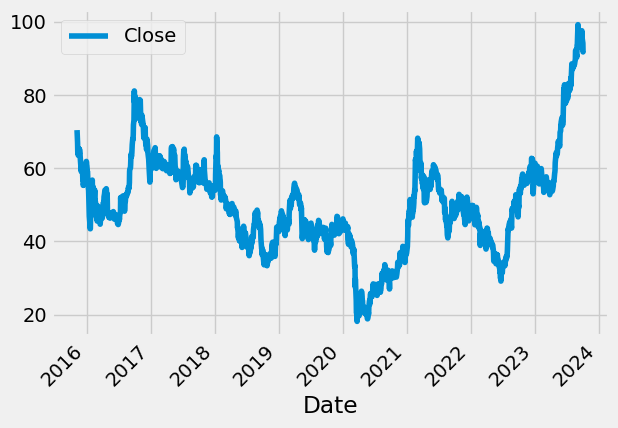

In [64]:
# Visualise the original data

df.plot(y="Close")
plt.xticks(rotation=45)
plt.show()

In [65]:
X= df[['Open','High','Low','Volume']]
Y = df['Close']

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [67]:
X_train.shape

(1465, 4)

In [68]:
X_test.shape

(489, 4)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
model = LinearRegression()



In [70]:
model.fit(X_train,Y_train)

LinearRegression()

In [71]:
print(model.coef_)

[-5.45638913e-01  8.01150408e-01  7.43101167e-01  2.19215091e-10]


In [72]:
print(model.intercept_)

0.0020374523636093045


In [73]:
predicted = model.predict(X_test)

In [74]:
print(X_test)

                 Open       High        Low     Volume
Date                                                  
2015-12-07  60.150002  60.900002  59.200001    2506784
2021-12-31  47.650002  49.349998  47.250000   48768010
2019-10-07  38.250000  38.599998  36.500000   20846366
2016-08-11  51.849998  52.500000  51.400002    3054439
2017-03-17  61.799999  62.150002  61.299999    6945320
...               ...        ...        ...        ...
2018-10-12  35.500000  36.750000  35.500000    9434139
2018-05-31  40.200001  41.400002  39.400002  167774948
2022-04-29  39.900002  40.500000  39.299999   24604133
2021-01-06  39.750000  42.849998  38.500000   80681106
2023-07-31  85.500000  88.300003  84.050003  101482338

[489 rows x 4 columns]


In [75]:
df_new = pd.DataFrame({'Actual price':Y_test,'Predicted':predicted})
df_new

,Actual price,Predicted
Date,,
2015-12-07,59.450001,59.964057
2021-12-31,48.349998,48.661334
2019-10-07,37.450001,37.183516
2016-08-11,52.299999,51.967128
2017-03-17,61.849998,61.626676
...,...,...
2018-10-12,36.500000,36.456293
2018-05-31,40.700001,40.549947
2022-04-29,39.500000,39.886904


In [76]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [77]:
model.score(X_test,Y_test) #accuracy score

0.9988676684676785

In [78]:
print('Mean absolute error:',metrics.mean_absolute_error(Y_test,predicted))

Mean absolute error: 0.3260862280636624


In [79]:
print('Mean squared error:',metrics.mean_squared_error(Y_test,predicted))

Mean squared error: 0.20593074854055562


In [80]:
print('Root Mean squared error:',math.sqrt(metrics.mean_squared_error(Y_test,predicted)))

Root Mean squared error: 0.45379593270605195


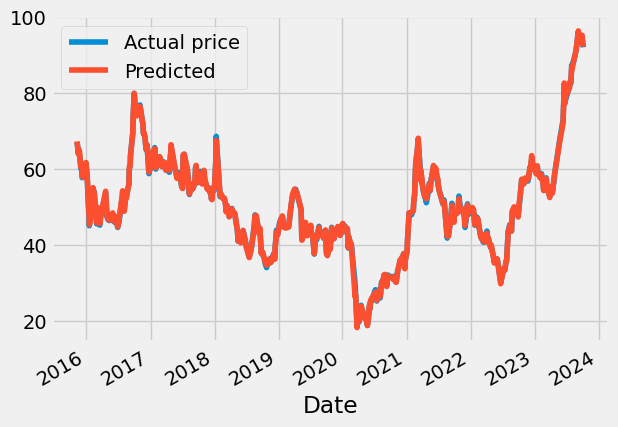

In [81]:
df_new.plot(kind='line')
plt.show()